
## Project Title :
### Credit Card Fraud Detection 
###                     - By Goverdhana Sai Srihitha

#### Importing the required Python Packages 

In [ ]:
import pandas as pd 
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from matplotlib import gridspec
from imblearn.over_sampling import ADASYN 
from collections import Counter

#scikit packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn import metrics

#### Checking the versions of above packages

In [ ]:
print(np.__version__) #Numpy
print(pd.__version__) #Pandas
print(sns.__version__) #Seaborn

1.18.5
1.0.5
0.10.1


In [ ]:
## Load the dataset from the csv file using pandas 
# copy the path for the csv file 
df = pd.read_csv("/content/creditcardproject.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.62,0
1,0.0,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.69,0
2,1.0,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.66,0
3,1.0,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.50,0
4,2.0,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,4.356,-1.593,2.712,-0.689,4.627,-0.924,1.108,1.992,0.511,-0.683,1.476,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.77,0
284803,172787.0,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,-0.976,-0.150,0.916,1.215,-0.675,1.165,-0.712,-0.026,-1.221,-1.546,0.060,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.79,0
284804,172788.0,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,-0.485,0.412,0.063,-0.184,-0.511,1.329,0.141,0.314,0.396,-0.577,0.001,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.88,0
284805,172788.0,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,-0.399,-1.934,-0.963,-1.042,0.450,1.963,-0.609,0.510,1.114,2.898,0.127,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.00,0


**Info about data:** it is a CSV file, contains 31 features, the last feature is used to classify the transaction whether it is a fraud or not

**Information about data set**

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. **Feature** **'Class'** is the response variable and it takes **value 1 in case of fraud and 0 otherwise.**

In [ ]:
# Describing the data 
# df.shape
print('This Dataset has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This Dataset has 284807 rows and 31 columns.


In [ ]:
# Peek at data 
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
133192,80284.0,1.257,0.251,0.277,0.707,-0.502,-1.108,-0.014,-0.121,0.254,-0.239,-0.316,-0.543,-1.238,0.004,1.254,0.547,0.078,-0.120,-0.188,-0.176,-0.305,-0.949,0.148,0.305,0.167,0.099,-0.032,0.028,0.99,0
41301,40628.0,-0.900,0.971,-0.451,-1.402,-0.794,-0.569,0.560,0.358,-2.177,-0.204,-1.227,-0.209,1.689,0.301,0.002,1.062,0.336,-1.221,1.086,-0.005,0.363,0.764,-0.158,-0.379,0.147,-0.149,-0.211,-0.027,137.66,0
160239,113178.0,2.025,-0.196,-1.440,0.088,0.124,-0.582,-0.055,-0.038,0.720,0.106,0.793,0.202,-1.577,0.986,0.412,-0.071,-0.637,0.690,0.024,-0.322,0.308,0.930,0.033,0.686,0.248,-0.465,-0.007,-0.060,1.00,0
137042,81991.0,0.893,0.489,0.628,1.076,-0.302,-0.349,-0.047,0.007,0.269,0.098,-0.846,0.204,0.734,-0.145,1.272,0.421,-0.708,0.331,0.147,-0.072,0.030,0.166,0.295,-0.151,-0.972,-0.607,0.024,-0.111,8.99,0
187106,127388.0,-0.934,-0.107,1.706,-2.425,-0.290,-0.056,0.200,0.043,-1.177,-0.188,0.401,-0.173,0.441,-0.577,-1.114,1.617,-0.507,-0.486,0.339,0.093,0.363,0.929,-0.474,-0.360,0.774,-0.055,-0.101,0.045,64.99,0


In [ ]:
# Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Data types 
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
# Statistical data Description of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481e+04,47488.146,0.000,54201.500,84692.000,139320.500,172792.000
V1,284807.0,1.759e-12,1.959,-56.408,-0.920,0.018,1.316,2.455
V2,284807.0,-8.252e-13,1.651,-72.716,-0.599,0.065,0.804,22.058
V3,284807.0,-9.637e-13,1.516,-48.326,-0.890,0.180,1.027,9.383
V4,284807.0,8.316e-13,1.416,-5.683,-0.849,-0.020,0.743,16.875
V5,284807.0,1.592e-13,1.380,-113.743,-0.692,-0.054,0.612,34.802
V6,284807.0,4.247e-13,1.332,-26.161,-0.768,-0.274,0.399,73.302
V7,284807.0,-3.050e-13,1.237,-43.557,-0.554,0.040,0.570,120.589
V8,284807.0,8.693e-14,1.194,-73.217,-0.209,0.022,0.327,20.007
V9,284807.0,-1.180e-12,1.099,-13.434,-0.643,-0.051,0.597,15.595


In [ ]:
# From the above data -->printing only non-anonymized columns of interest 
pd.set_option('precision',3)
df.loc[:,['Time',"Amount"]].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Imbalance in data 
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Transaction Cases: {}'.format(len(df[df['Class'] == 1])))
print('Legal Transactions : {}'.format(len(df[df['Class'] == 0])))

0.0017304750013189597
Fraud Transaction Cases: 492
Legal Transactions : 284315


Observation : 

Only 0.17% fraudelent transaction out of all the transactions. The data is highly unbalanced.  

In [ ]:
# Print the amount details for Fraudulent Transaction
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000
mean      122.211
std       256.683
min         0.000
25%         1.000
50%         9.250
75%       105.890
max      2125.870
Name: Amount, dtype: float64

In [ ]:
# Print the amount details for Normal(valid) Transaction
print('The amount details of valid transaction ')
valid.Amount.describe() 

The amount details of valid transaction 


count    284315.000
mean         88.291
std         250.105
min           0.000
25%           5.650
50%          22.000
75%          77.050
max       25691.160
Name: Amount, dtype: float64

From above two codes we can clearly notice that , the **Average money** transaction for **fraudlent** ones is more . This makes this problem cruical to deal with

#### Visualizations 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


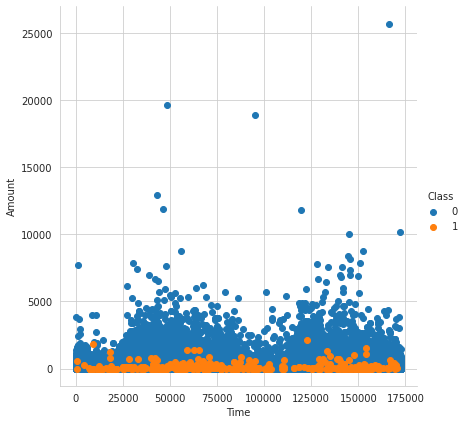

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


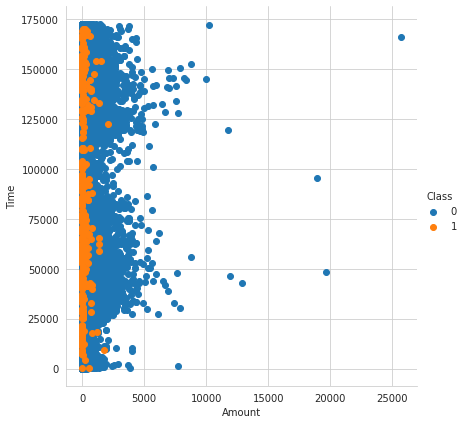

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", size = 6).map(plt.scatter, "Amount", "Time").add_legend()
plt.show()

#### Plotting the correlation Matrix 

The correlation matrix graphically gives us an idea of how features correlate with each other and can help us tp predict what are the features that are most relevant for the prediction

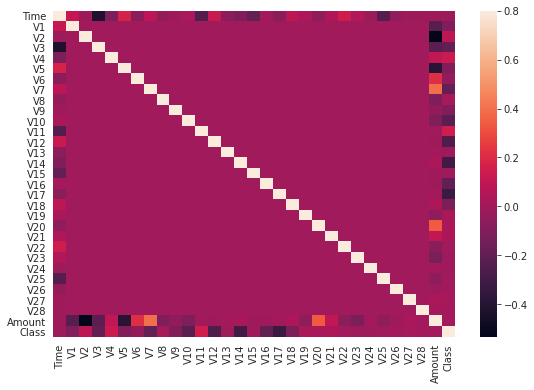

In [ ]:
# Correlation Matrix 
cor_matrix = df.corr()
fig = plt.figure(figsize = (9,6))
sns.heatmap(cor_matrix, vmax= .8 )
plt.show()

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.

### 3-D Scatter Plot

In [ ]:
FiltredData =df[['Time','Amount','Class']]

In [ ]:
FiltredData

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0
...,...,...,...
284802,172786.0,0.77,0
284803,172787.0,24.79,0
284804,172788.0,67.88,0
284805,172788.0,10.00,0


In [ ]:
print(FiltredData.shape)

(284807, 3)


In [ ]:
FiltredData["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


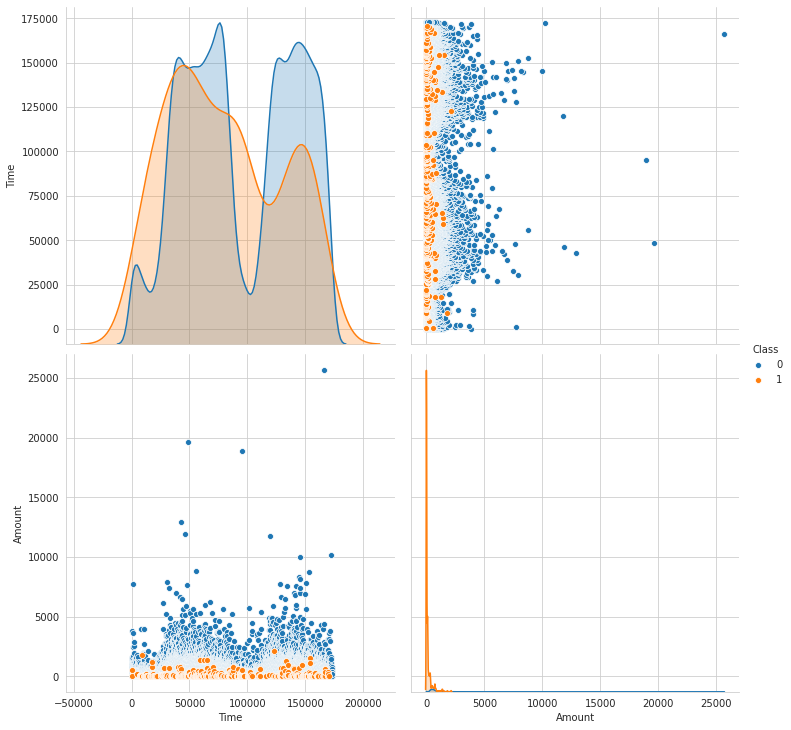

In [ ]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(FiltredData, hue="Class", size=5);
plt.show()


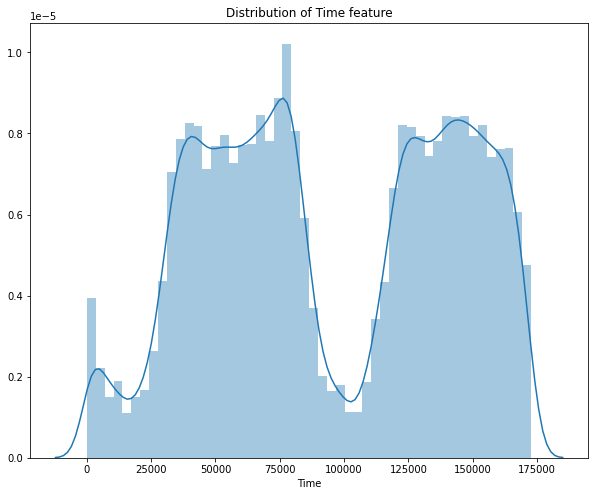

In [ ]:
# visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title("Distribution of Time feature")
sns.distplot(df.Time)
plt.show()

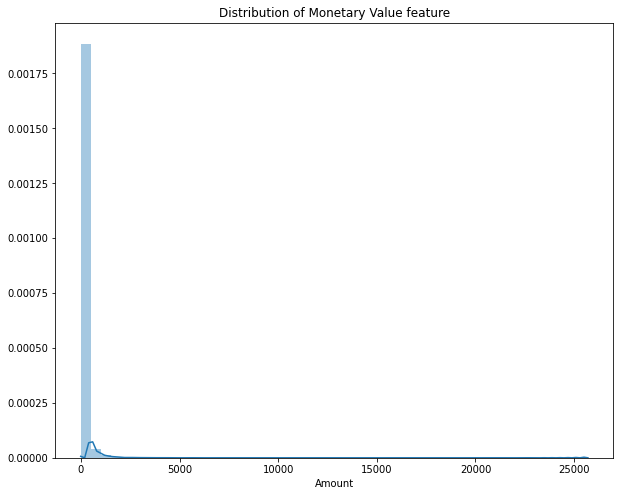

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Monetary Value feature")
sns.distplot(df.Amount)
plt.show()

In [ ]:
counts = df.Class.value_counts()
valid = counts[0]
fraudulent = counts[1]
perc_valid = (valid/(+fraudulent))*100
perc_fraudulent = (fraudulent/(valid+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) {} fraudulent transactions ({:.3f}%).'.format(valid, perc_valid, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (57787.602%) 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

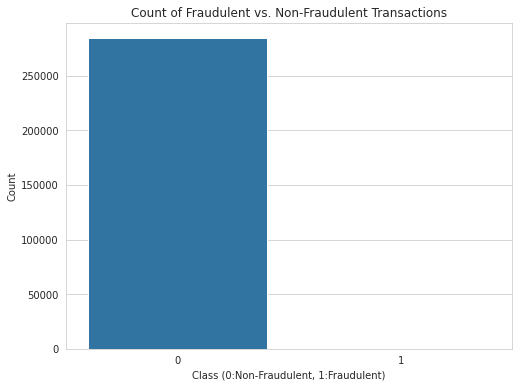

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index,y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

### Box Plot and Whiskers 

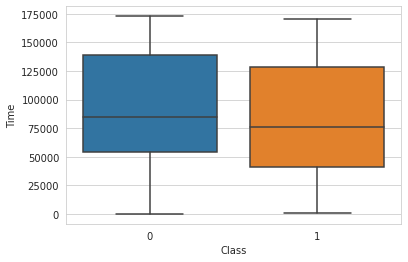

In [ ]:
sns.boxplot(x ='Class' , y='Time' ,data = df)
plt.show()

Observations:

By looking at the above box plot we can say that both fraud & genuine transactions occur throughout time and there is no distinction between them.

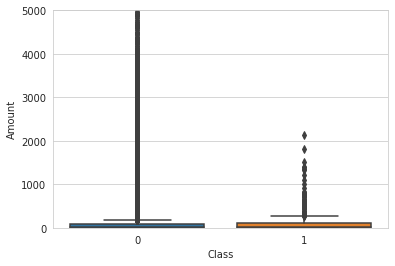

In [ ]:
sns.boxplot(x = "Class", y = "Amount", data = df)
plt.ylim(0, 5000)
plt.show()

Observations:

From above box plot we can easily infer that there are no fraud transactions occur above the transaction amount of 3000. All of the fraud transactions have transaction amount less than 3000. However, there are many transactions which have a transaction amount greater than 3000 and all of them are genuine.

In [ ]:
# feature data (predictors)
X = df.iloc[:, :-1]

# label class
y = df['Class']

### Standardize data
Scale the data to have zero mean and unit variance.

In [ ]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

###  Separating the X and the Y values





In [ ]:
# Dividing the data into inputs parameters and outputs value format
X = df.drop(['Class'], axis = 1)
y = df['Class']
print(X.shape)
print(y.shape)
Xdata = X.values
ydata = y.values

(284807, 30)
(284807,)


### Training and Testing Data Bifurcation

We will be dividing the dataset into two main groups. One for **training** the model and the other for testing our trained modle's performance

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(Xdata,ydata,test_size = 0.2, random_state = 42)

### **Data Sampling**
As noted earlier, the dataset is unbalanced. Training unbalanced dataset with learning algorithms may lead to misclassification of minority class. Therefore, to compensate for the unbalancedness, we will use ADASYN oversampling method as implemented in imbalanced-learn package to resample the dataset.
ADASYN (ADAptive SYNthetic) is an oversampling technique that adaptively generates minority data samples according to their distributions using K nearest neighbor.

In [ ]:
# apply the ADASYN over-sampling
ada = ADASYN(random_state=42)
print('Original dataset shape {}'.format(Counter(y_train)))
X_res, y_res = ada.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 227451, 1: 394})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({0: 227451, 1: 227373})


### Training the  Models
Three machine learning algorithms: 


##### Logistic Regression


#####  Naive Baye


In [ ]:
X_train, y_train = X_res, y_res 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression()
LGR_Classifier.fit(X_train, y_train);


# Train Bernoulli Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train);

In [ ]:
modlist = [('LogisticRegression', LGR_Classifier),
('Naive Baiye Classifier', BNB_Classifier)] 

models = [j for j in modlist]

print()
print('========================== Model Evaluation Results ========================' "\n")  

for i, v in models:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
    classification = metrics.classification_report(y_train, v.predict(X_train))
    print('===== {} ====='.format(i))
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification) 
    print()


========================== Model Evaluation Results ========================



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


===== LogisticRegression =====

Cross Validation Mean Score:  96.7%

Model Accuracy:  97.1%

Confusion Matrix:
 [[222851   4600]
 [  8806 218567]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97    227451
           1       0.98      0.96      0.97    227373

    accuracy                           0.97    454824
   macro avg       0.97      0.97      0.97    454824
weighted avg       0.97      0.97      0.97    454824


===== Naive Baiye Classifier =====

Cross Validation Mean Score:  94.0%

Model Accuracy:  94.0%

Confusion Matrix:
 [[226656    795]
 [ 26469 200904]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.94    227451
           1       1.00      0.88      0.94    227373

    accuracy                           0.94    454824
   macro avg       0.95      0.94      0.94    454824
weighted avg       0.95      0.94      0.94    45482

### Test models

#### Logistic Regression


#### Naive Bayes 

In [ ]:
# Test models
classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model Test Results ========================' "\n")   

for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test))   
    print('=== {} ==='.format(i))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
   # pf.plot_confusion_matrix(confusion_matrix, classes = list(classdict.keys()), title='Confusion Matrix Plot', cmap=plt.cm.summer)
    print() 
    print("Classification Report:" "\n", classification) 
    print() 


========================== Model Test Results ========================

=== LogisticRegression ===
Model Accuracy:  98.0%

Confusion Matrix:
 [[55722  1142]
 [   10    88]]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.90      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962


=== Naive Baiye Classifier ===
Model Accuracy:  99.6%

Confusion Matrix:
 [[56678   186]
 [   18    80]]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.30      0.82      0.44        98

    accuracy                           1.00     56962
   macro avg       0.65      0.91      0.72     56962
weighted avg       1.00      1.00      1.00     56962




#### Confusion matrix for Naive Bayes Algorithm

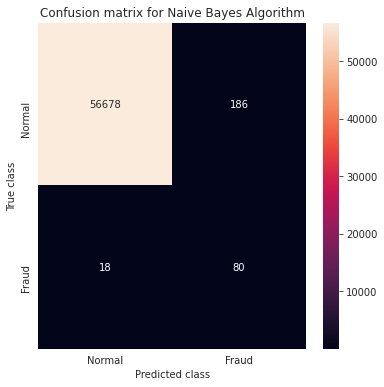

In [ ]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))  
plt.figure(figsize =(6, 6)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix for Naive Bayes Algorithm") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

### Random Forest Model

### Training and testing using RandomForest classifiers.

#### Building a  Random Forest Model  using skicit learn



In [ ]:
# Building the Random Forest Classifier (RANDOM FOREST) 
from sklearn.ensemble import RandomForestClassifier
X_train,y_train = X_res,y_res

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train);

# Prediction
y_pred = rfc.predict(X_test);

####  Building all kinds of evaluating parameters

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix


In [ ]:
n_outliers = len(fraud) 
n_errors = (y_pred != y_test).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test, y_pred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, y_pred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

The model used is Random Forest classifier
The accuracy is 0.9995259997893332
The precision is 0.8817204301075269
The recall is 0.8367346938775511
The F1-Score is 0.8586387434554974
The Matthews correlation coefficient is0.8586967748445028


#### Visulalizing the Confusion Matrix

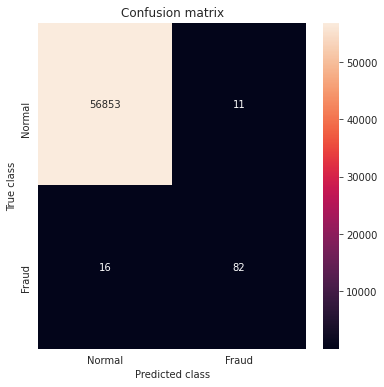

In [ ]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

#### Conclusion : 

.


Best Model among above three are Naive Bayes Algorithm . The Accuracy of predicting the Output is high by using this Algorithm . 

colab link : https://colab.research.google.com/drive/1gKQ1u4MK66ZYwhN_jm5VeEMJqMhpp9VW?usp=sharing&authuser=1